## <font color='##34495E'>Customer Segmentation Using Machine Learning</font>  
### <font color='#2E86C1'>Machine Learning with Python and Power BI for Business Reporting</font>

### 💼 Business Problem

Based on historical customer data from purchases in our company, perform a **segmentation of clients into 3 groups** according to similar characteristics. The goal is to deliver the Marketing team a **clear report with the average age, income, and spending score per segment**, enabling more targeted strategies.

---

## <font color='##34495E'>Segmentação de Clientes Utilizando Machine Learning</font>  
### <font color='#2E86C1'>Machine Learning com Python e Power BI para Geração de Relatórios Empresariais</font>

### 💼 Problema de Negócio

Considerando dados históricos de clientes que realizaram compras em nossa empresa, realize o **agrupamento (segmentação)** dos clientes em **3 grupos com características semelhantes**. O objetivo é fornecer à equipe de Marketing um **relatório claro com os segmentos e suas médias de idade, renda e pontuação de gasto**, a fim de personalizar estratégias de atuação.

---



In [12]:
#version
from platform import python_version
print("Python version used in this project",python_version())

Python version used in this project 3.12.7


In [39]:
#Imports 
import os
# Just 2 threads to avoid memory leak warning (Windows + MKL + KMeans)
os.environ["OMP_NUM_THREADS"] = "2" 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import dataframe_image as dfi
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


### <font color='#2E86C1'>Loading data</font> 

In [14]:
df = pd.read_csv('../data/dados_clientes.csv')

In [15]:
#first 15 lines
df.head(15)

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51
5,6,25,145729,37
6,7,38,66175,96
7,8,56,27805,87
8,9,36,25237,78
9,10,40,135247,29


### <font color='#2E86C1'>Exploratory Analysis</font> 

In [16]:
df[['idade', 'renda_anual', 'pontuacao_gastos']].describe()

,idade,renda_anual,pontuacao_gastos
count,500.000000,500.000000,500.000000
mean,44.732000,81557.166000,48.512000
std,15.239707,36764.379945,29.556946
min,18.000000,20384.000000,0.000000
25%,32.000000,49172.750000,24.000000
50%,45.000000,79219.000000,48.500000
75%,57.000000,113017.250000,73.250000
max,70.000000,149695.000000,100.000000


In [17]:
# Select the relevant columns for segmentation
features = df[['idade', 'renda_anual', 'pontuacao_gastos']]

### <font color='#2E86C1'>Data Pre-Processing</font> 

In [18]:
# Create the data standardizer
standardizer = StandardScaler()

# Applies the standardizer only to the columns of interest
data_standardizer = standardizer.fit_transform(features)


In [19]:
print(data_standardizer)

[[ 0.74012478  0.35893538  1.40506904]
 [ 1.59401387  1.49192537  0.05039391]
 [ 0.08328703  0.13776654  0.45679645]
 ...
 [-0.31081563  0.32661636  0.18586143]
 [-1.23038848 -1.48706069  1.43893592]
 [-1.03333716 -0.96992912 -0.59307677]]


### <font color='#2E86C1'> Validation of the Number of Clusters (K) </font>

Before defining the number of clusters to be used in the segmentation model, it is important to validate the optimal value of **K**. In this step, we will apply two techniques:

1. **Elbow Method** – evaluates the inertia (within-cluster sum-of-squares) to find the point of diminishing returns.
2. **Silhouette Score** – measures how well-defined and distinct the clusters are.

These analyses help justify the number of segments defined and increase the model's robustness.

**Elbow Method**


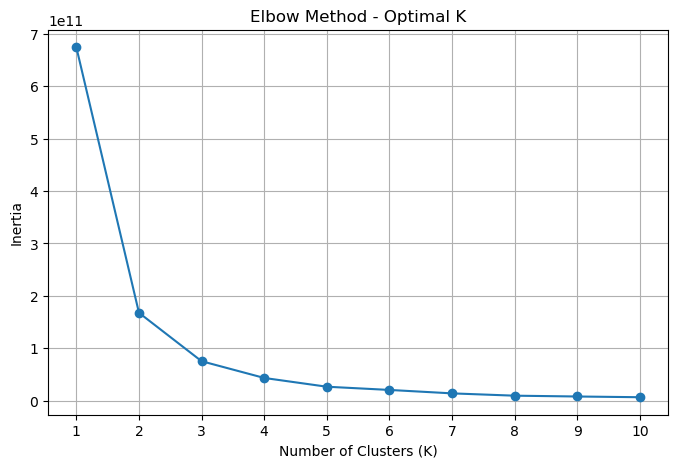

In [21]:
# Elbow Method to determine the optimal K
inertia = []
k_range = range(1, 11)

# Define a fixed seed for reproducibility
# 42 is commonly used as a standard random_state value in data science
# This ensures consistent clustering results across runs
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features)  
    inertia.append(model.inertia_)


# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal K')
plt.xticks(k_range)
plt.grid(True)

plt.savefig("../img/elbow_method.png", bbox_inches='tight')
plt.show()

**Silhouette Score**

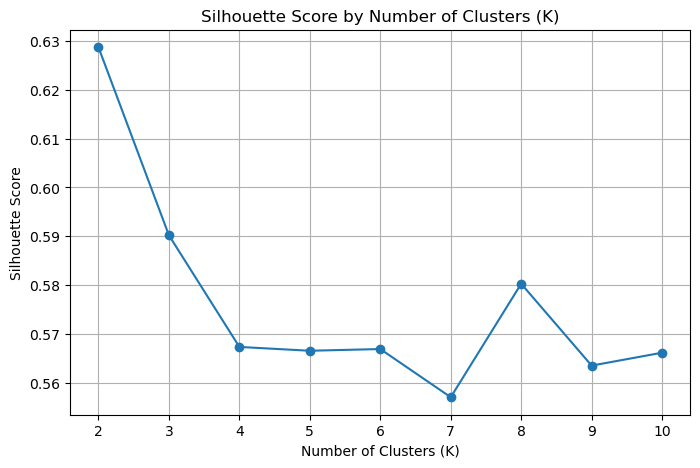

In [22]:
# List to store silhouette scores
scores = []

# Range of K values to test (must start at 2)
k_range = range(2, 11)

# Loop through each value of K
for k in k_range:
    # Initialize the KMeans model with current K
    kmeans = KMeans(
        n_clusters=k,         # Number of clusters
        random_state=42,      # Ensures reproducibility
        n_init=10             # Run the algorithm 10 times with different centroid seeds
    )

    # Fit the model and predict cluster labels for each point
    labels = kmeans.fit_predict(features)

    # Compute the silhouette score for this clustering
    score = silhouette_score(features, labels)

    # Store the score for later visualization
    scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.savefig("../img/silhouette-scores.png", bbox_inches='tight')
plt.show()


**Cluster Validation Summary✅**

- Elbow Method: The curve shows a noticeable drop in inertia until K=3, after which the decrease becomes marginal. This suggests that 3 is a good choice for the number of clusters.

- Silhouette Score: The highest silhouette score is also observed at K=2, but K=3 maintains a relatively high score while aligning with the business requirement.

- Conclusion: Based on both metrics, **K=3** provides a good balance between cohesion and separation of clusters, making it a valid and justifiable choice for this segmentation task.


### <font color='#2E86C1'>Building a Machine Learning Model for Customer Segmentation</font> 

In [23]:
# Create the K-means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [24]:
# Model training with standardized data
kmeans.fit(data_standardizer)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [25]:
# Assign cluster labels to clients
df['cluster'] = kmeans.labels_

In [26]:
# Display the result (first 10 lines)
df.head(10)

,id,idade,renda_anual,pontuacao_gastos,cluster
0,1,56,94740,90,2
1,2,69,136352,50,2
2,3,46,86617,62,1
3,4,32,114841,97,0
4,5,60,36896,51,1
5,6,25,145729,37,0
6,7,38,66175,96,1
7,8,56,27805,87,1
8,9,36,25237,78,1
9,10,40,135247,29,2


In [27]:
# Random sample of data
df.sample(10)

,id,idade,renda_anual,pontuacao_gastos,cluster
287,288,42,33116,24,1
428,429,56,118142,53,2
35,36,45,74340,15,0
411,412,41,26970,40,1
163,164,66,91180,8,2
177,178,49,86234,78,1
187,188,45,55270,25,1
270,271,36,46790,3,0
446,447,29,65106,83,0
240,241,18,82856,59,0


In [28]:
# Save the result to disk
df.to_csv('../data/segmentos_clientes.csv', index= False)

### <font color='#2E86C1'> Cluster Evaluation and Interpretation </font>

After assigning each customer to a cluster using the **K-means algorithm**, it's essential to validate the quality and relevance of the resulting segmentation.

In this section, we will analyze the **behavior and consistency** of each cluster using the following techniques:

1. **Cluster Averages** – we’ll compare the mean values of key variables (*Age*, *Annual Income*, *Spending Score*) to identify patterns and distinctions.
2. **Cluster Distribution** – we’ll use visualizations to assess how customers are spread across clusters.


This analysis ensures that the segmentation is not only statistically sound but also **actionable for decision-making**.


**Cluster Averages**

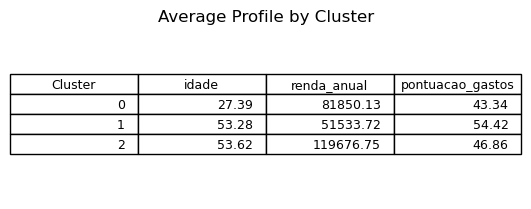

In [44]:
# Recalculate and round the table
cluster_summary = df[['idade', 'renda_anual', 'pontuacao_gastos', 'cluster']].copy()
cluster_means = cluster_summary.groupby('cluster').mean(numeric_only=True)
rounded_means = cluster_means.round(2)

# Create the table as image
fig, ax = plt.subplots(figsize=(6, 2.2))
ax.axis('off')
ax.axis('tight')

# Add the row label name ("Cluster") as a column name
row_labels = [str(idx) for idx in rounded_means.index]
col_labels = ['Cluster'] + list(rounded_means.columns)
cell_text = [[row_labels[i]] + list(rounded_means.iloc[i]) for i in range(len(rounded_means))]

# Create and style table
table = ax.table(cellText=cell_text,
                 colLabels=col_labels,
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.1, 1.2)

plt.title("Average Profile by Cluster", fontsize=12)
plt.savefig("../img/cluster-averages.png", bbox_inches='tight')
plt.show()


**Cluster Distribution**

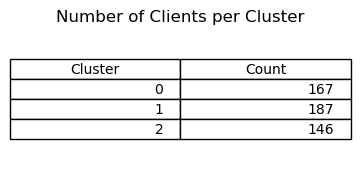

In [45]:
# Count the number of clients in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts = cluster_counts.rename_axis("Cluster").reset_index(name="Count")

# Create and save the table as image
fig, ax = plt.subplots(figsize=(4, 1.8))
ax.axis('off')
ax.axis('tight')

# Build table content
cell_text = cluster_counts.values.tolist()
col_labels = cluster_counts.columns.tolist()

# Create the table
table = ax.table(cellText=cell_text,
                 colLabels=col_labels,
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.1, 1.2)

plt.title("Number of Clients per Cluster", fontsize=12)
plt.savefig("../img/cluster-distribution.png", bbox_inches='tight')
plt.show()


**Cluster Validation Summary ✅**

Cluster Averages:
Each cluster shows distinct patterns in average age, income, and spending score, indicating meaningful behavioral differences.

Cluster Distribution:  
The number of clients per cluster is relatively balanced, with no dominant or underrepresented group.

Conclusion:  
The segmentation into 3 clusters is consistent and actionable for marketing strategies.

**Cluster Validation Summary**

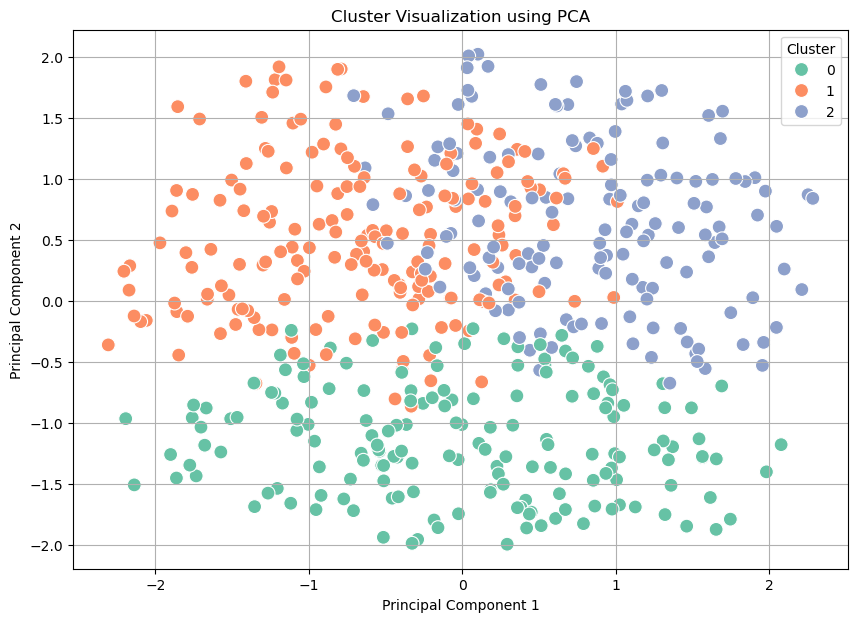

In [31]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(data_standardizer)

# Add components to the DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)

# Save before showing
plt.savefig("../img/pca_clusters.png", bbox_inches='tight')
plt.show()


**Boxplots for each variable by cluster**


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23048\3757786428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=col, palette='Set2')
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23048\3757786428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=col, palette='Set2')
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23048\3757786428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=col, palette='Set2')


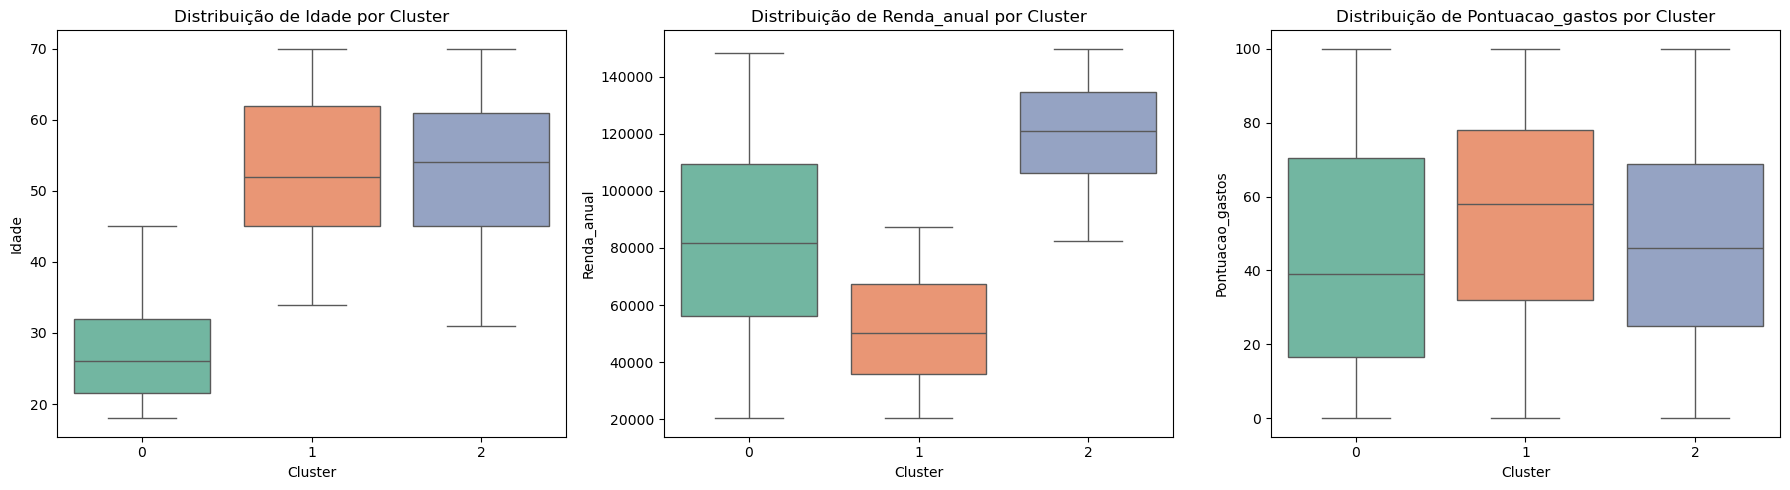

In [ ]:
# Boxplots for each variable by cluster
plt.figure(figsize=(18, 5))

for i, col in enumerate(['idade', 'renda_anual', 'pontuacao_gastos']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='cluster', y=col, palette='Set2')
    plt.title(f'Distribuição de {col.capitalize()} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col.capitalize())

plt.tight_layout()

plt.savefig("../img/boxplots.png", bbox_inches='tight')
plt.show()


**Pairplot (scatter matrix)**

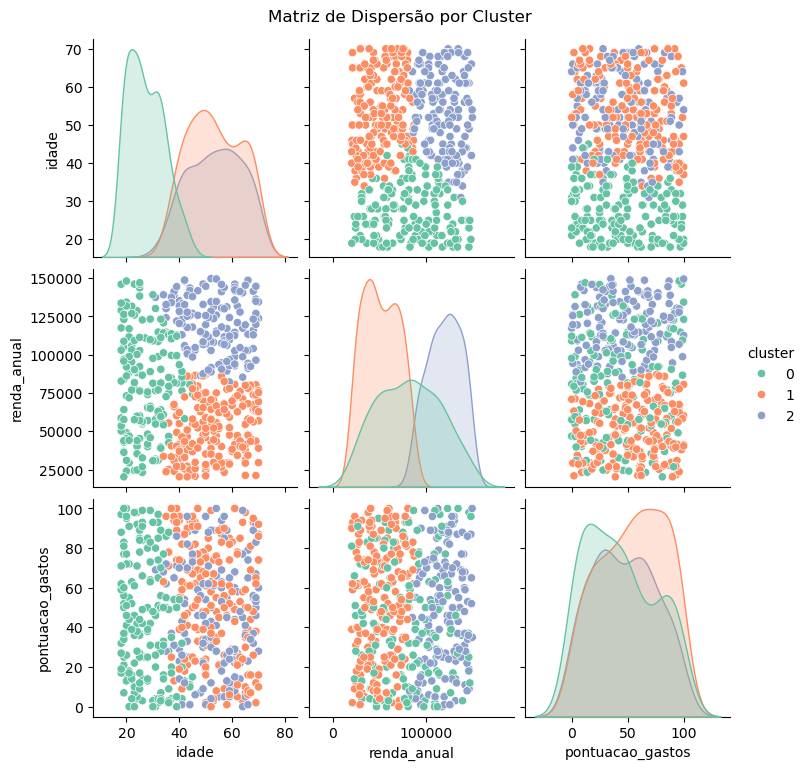

In [ ]:
# Pairplot (scatter matrix) for variable relationships by cluster
sns.pairplot(df[['idade', 'renda_anual', 'pontuacao_gastos', 'cluster']], hue='cluster', palette='Set2', diag_kind='kde')

plt.suptitle("Matriz de Dispersão por Cluster", y=1.02)

plt.savefig("../img/pairplot.png", bbox_inches='tight')
plt.show()


**Radar Chart**

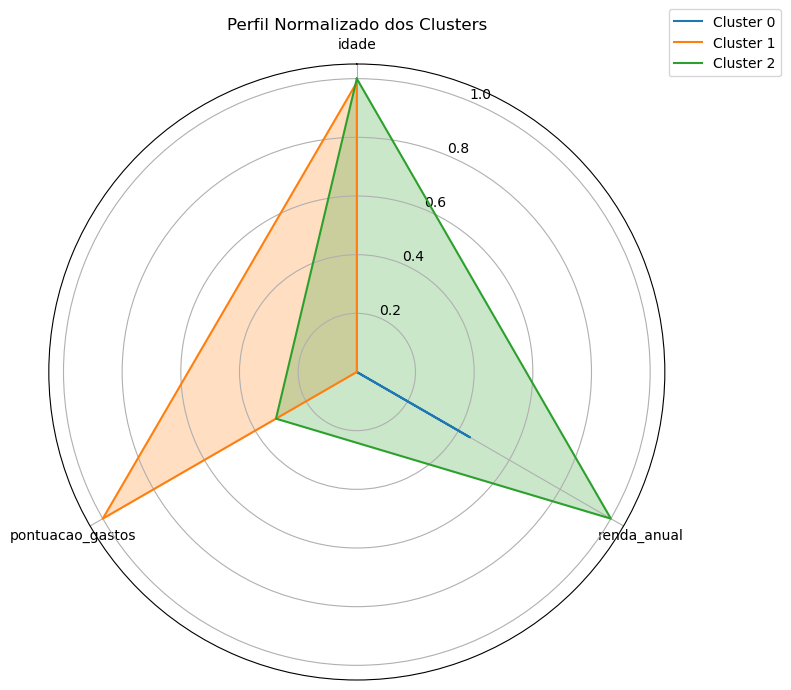

In [ ]:

# Normalize data for the radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_means)

# Setup radar chart variables
labels = cluster_means.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in enumerate(cluster_scaled):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Perfil Normalizado dos Clusters')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.savefig("../img/radar-chart.png", bbox_inches='tight')
plt.show()


### <font color='#2E86C1'>Generating Customer Segment Reports with Power BI in Jupyter Notebook</font> 

In [ ]:
# Loads the functions used to authenticate and generate reports

from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [ ]:
# Set authentication in Power BI Service
device_auth = DeviceCodeLoginAuthentication()

In [ ]:
# Create the report in Power BI
dash_PBI = QuickVisualize(get_dataset_config(df), auth = device_auth)

In [ ]:
# Render (view) the report
dash_PBI